In [33]:
%matplotlib inline
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint as sp_randint
from sklearn.preprocessing import StandardScaler
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import graphviz 
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 500)

In [34]:
data = pd.read_csv('alldata.csv')

C:\Users\Naeemah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
data['AGE'] = pd.to_numeric(data['AGE'])

In [36]:
bins = [20, 30,  40,  50,  60,  70,  80]
data['AGE_BINS'] = pd.cut(data['AGE'], bins)

In [37]:
data['SALARY_NEW'] = data[' SALARY '].str.replace('$', '')

In [38]:
data['SALARY_NEW'] = data['SALARY_NEW'].str.replace(',', '')

In [39]:
data['SALARY'] = data['SALARY_NEW'].str.replace(' -   ', '')

In [40]:
data = data.drop('SALARY_NEW', axis=1)

In [41]:
data['SALARY'] = pd.to_numeric(data['SALARY'], errors='coerce')

In [42]:
bins = [0, 5000, 10000, 20000,  30000,  40000,  50000,  60000,  70000,  80000, 90000, 100000, 200000]
data['SALARY_BINS'] = pd.cut(data['SALARY'], bins)

In [43]:
data = data.drop('SALARY', axis=1)

In [44]:
data = data.drop(' SALARY ', axis=1)

In [45]:
data = data.drop('REFID', axis=1)
data = data.drop('MINORITY', axis=1)

In [46]:
data['FIELD_MAJOR_RECENT_DEGREE'].fillna('None', inplace=True)

In [47]:
mydata = data

In [48]:
Xone = pd.get_dummies(mydata, prefix_sep='_', drop_first=False)

In [49]:
Xone = Xone.drop(['SATISFACTION_JOB_Somewhat dissatisfied','SATISFACTION_JOB_Somewhat satisfied','SATISFACTION_JOB_Very dissatisfied'], axis=1)

In [50]:
X = Xone.drop('SATISFACTION_JOB_Very satisfied',axis=1)
y = Xone['SATISFACTION_JOB_Very satisfied']
X_col_name = X.columns
y_col_name = ["Happy","Not Happy"]

In [51]:
feature_names = ['AGE','SATISFACTION_JOB_ADVANCE_Somewhat dissatisfied','SATISFACTION_JOB_ADVANCE_Somewhat satisfied','SATISFACTION_JOB_ADVANCE_Very dissatisfied','SATISFACTION_JOB_ADVANCE_Very satisfied','SATISFACTION_JOB_BENEFITS_Very satisfied','SATISFACTION_JOB_CHALLENGE_Somewhat dissatisfied','SATISFACTION_JOB_CHALLENGE_Somewhat satisfied','SATISFACTION_JOB_CHALLENGE_Very dissatisfied','SATISFACTION_JOB_CHALLENGE_Very satisfied','SATISFACTION_JOB_INDEP_Somewhat dissatisfied','SATISFACTION_JOB_INDEP_Somewhat satisfied','SATISFACTION_JOB_INDEP_Very satisfied','SATISFACTION_JOB_LOC_Somewhat satisfied','SATISFACTION_JOB_LOC_Very satisfied','SATISFACTION_JOB_RESP_Somewhat dissatisfied','SATISFACTION_JOB_RESP_Somewhat satisfied','SATISFACTION_JOB_RESP_Very satisfied','SATISFACTION_JOB_SALARY_Somewhat dissatisfied','SATISFACTION_JOB_SALARY_Somewhat satisfied','SATISFACTION_JOB_SALARY_Very dissatisfied','SATISFACTION_JOB_SALARY_Very satisfied','SATISFACTION_JOB_SECURITY_Somewhat dissatisfied','SATISFACTION_JOB_SECURITY_Somewhat satisfied','SATISFACTION_JOB_SECURITY_Very satisfied','SATISFACTION_JOB_CONTRIB_SOCIETY_Somewhat dissatisfied','SATISFACTION_JOB_CONTRIB_SOCIETY_Somewhat satisfied','SATISFACTION_JOB_CONTRIB_SOCIETY_Very satisfied']
target_names = ['Happy','Not Happy']

In [52]:
model = DecisionTreeClassifier(max_depth = 8, random_state=1111)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=1111) 
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1111, splitter='best')

In [54]:
Predictions = model.predict(X_test)
metrics.accuracy_score(y_test, Predictions)

0.8097795591182365

In [55]:
dot_data = tree.export_graphviz(model, out_file=None, max_depth=8,
                         feature_names=X_col_name,  
                         class_names=y_col_name,  
                         filled=True, rounded=True,  
                         special_characters=True)

graph2 = graphviz.Source(dot_data)

In [56]:
graph2
graph2.render('mytree')


'mytree.pdf'

In [57]:
os.startfile('mytree.pdf')

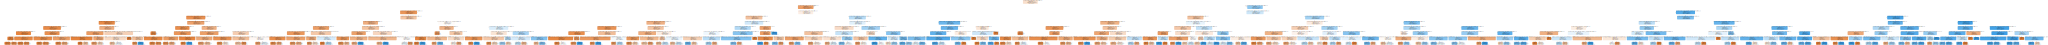

In [58]:
graph2

# Evaluating Classification Model

Model evaluation is the process of choosing between models, different model types, tuning parameters, and features. Better evaluation processes lead to better, more accurate models in your applications.